In [81]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
import math

In [25]:
#Reading Dataset

df = pd.read_csv('Ecommerce Customers.csv')

In [26]:
# Reading first 5 rows
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [27]:
#Checking shape
df.shape

(500, 8)

In [28]:
#checking datatype and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [29]:
#checking null values
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [30]:
#checking datatype
df.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [31]:
#checking unique values
df['Avatar'].value_counts()

SlateBlue               7
Cyan                    7
CadetBlue               7
GreenYellow             7
Teal                    7
                       ..
MediumPurple            1
CornflowerBlue          1
LightGoldenRodYellow    1
PowderBlue              1
LawnGreen               1
Name: Avatar, Length: 138, dtype: int64

In [32]:
#checking column names
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [33]:
#describe statistics of data
df.describe().style.background_gradient(cmap='winter')

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [34]:
#checking unique values in each column
df.nunique()

Email                   500
Address                 500
Avatar                  138
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64

## EDA

#### Checking outliers using boxplots

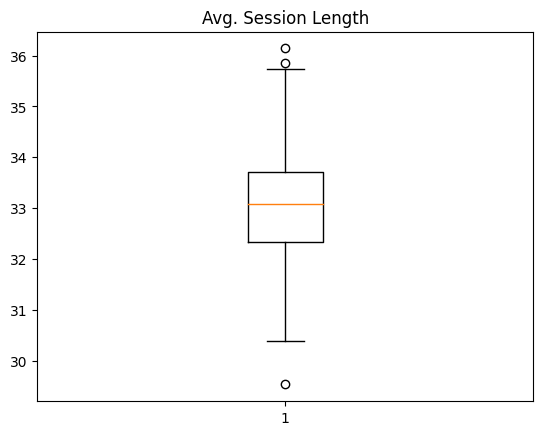

In [35]:
#Boxplots
plt.boxplot(df['Avg. Session Length'])
plt.title('Avg. Session Length')
plt.show()

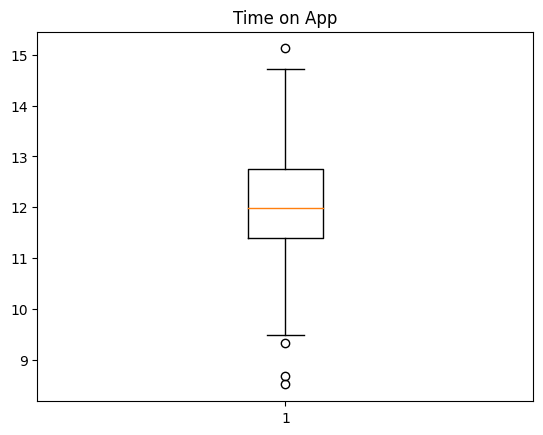

In [36]:
plt.boxplot(df['Time on App'])
plt.title('Time on App')
plt.show()

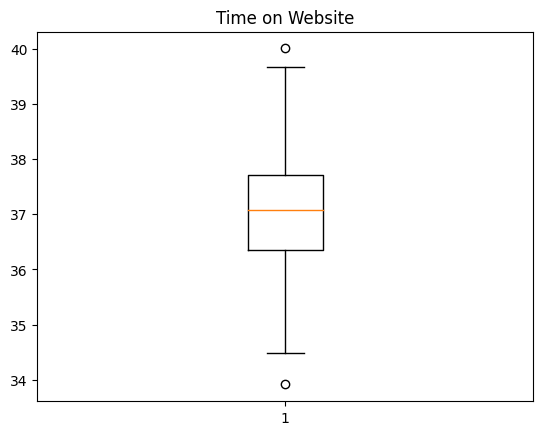

In [37]:
plt.boxplot(df['Time on Website'])
plt.title('Time on Website')
plt.show()

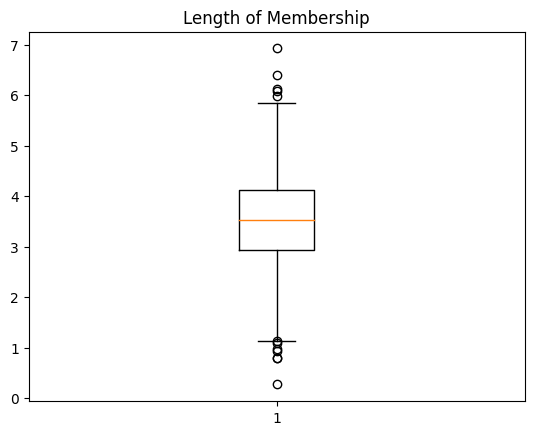

In [38]:
plt.boxplot(df['Length of Membership'])
plt.title('Length of Membership')
plt.show()

#### Checking relationships between features using scatterplots

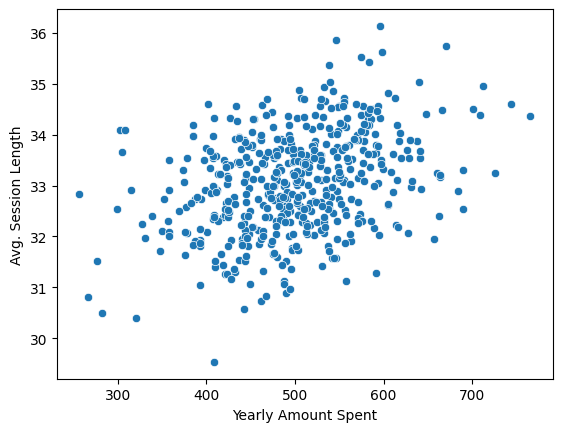

In [39]:
# Scatterplots
sns.scatterplot(data=df,x='Yearly Amount Spent',y='Avg. Session Length')
plt.show()

In [40]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

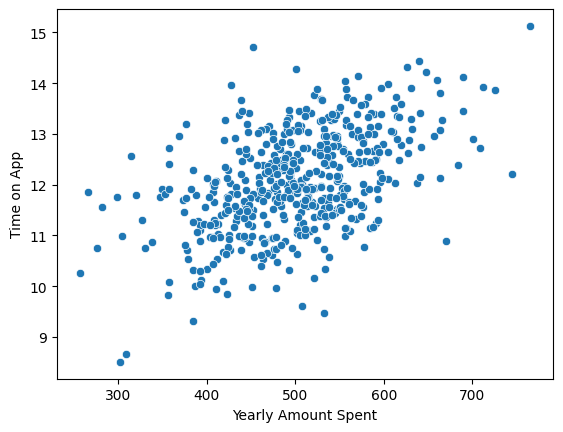

In [41]:
sns.scatterplot(data=df,x='Yearly Amount Spent',y='Time on App')
plt.show()

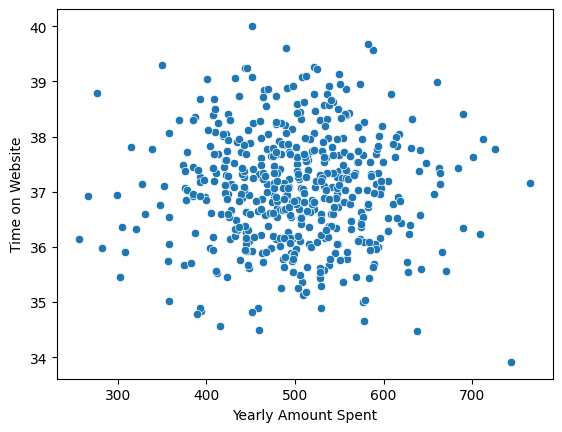

In [42]:
sns.scatterplot(data=df,x='Yearly Amount Spent',y='Time on Website')
plt.show()

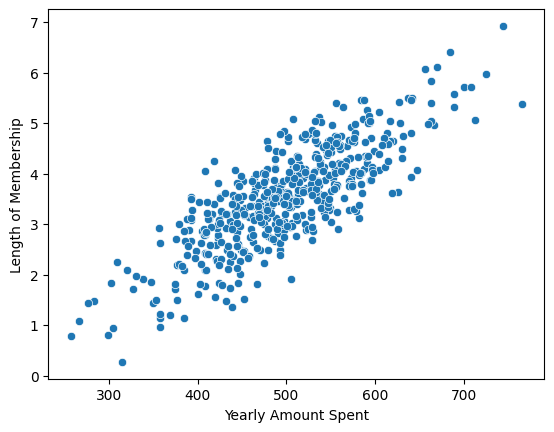

In [43]:
sns.scatterplot(data=df,x='Yearly Amount Spent',y='Length of Membership')
plt.show()

In [44]:
# seperating dependent and independent features

X = df.iloc[:,3:-1]

y = df.iloc[:,-1]

In [45]:
#Checking first five rows
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [46]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

<AxesSubplot: >

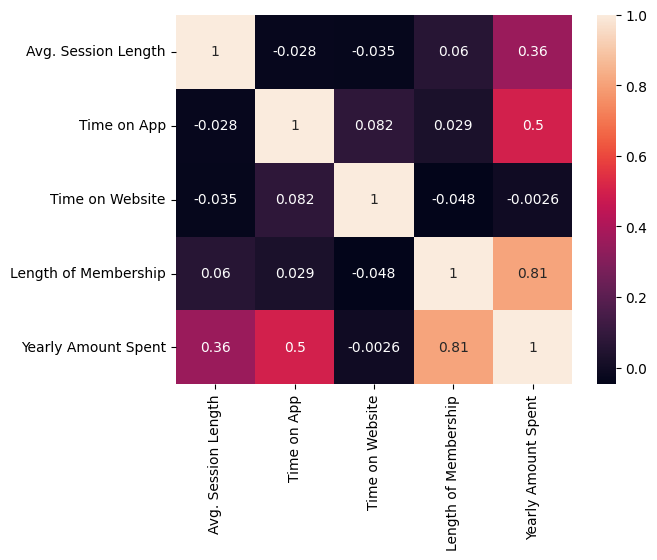

In [47]:
# Looking for correlation between independent variables
sns.heatmap(df.corr(),annot=True)

### VIF

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
numerical_col = [i for i in df.columns if df[i].dtype != 'object']
numerical_col

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

In [50]:
data = pd.DataFrame(df[numerical_col],columns=numerical_col)

spent = df['Yearly Amount Spent']

numerical=[i for i in numerical_col if i!='Yearly Amount Spent']
numerical

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership']

In [52]:
for i in range(0, len(numerical)):
    
  # taking one column as target variable
   # taking one column as target variable
    y=data['Yearly Amount Spent']
  # taking all other remaining columns as fetaure variable
    x=data[numerical]

    # fitting the OLS model on y and x
    model = sm.OLS(y,x)

    results = model.fit()

    # geting the r^2 value of results.
    rsq = results.rsquared

    # calculating vif value
    vif = round(1/(1-rsq),2)

    print("R Square value of {} columns is {} keeping all other columns as features".format(numerical[i],(round(rsq, 2))))
    print("Variance inflation Factor of {} columns is {} \n".format(numerical[i], vif))

R Square value of Avg. Session Length columns is 1.0 keeping all other columns as features
Variance inflation Factor of Avg. Session Length columns is 496.68 

R Square value of Time on App columns is 1.0 keeping all other columns as features
Variance inflation Factor of Time on App columns is 496.68 

R Square value of Time on Website columns is 1.0 keeping all other columns as features
Variance inflation Factor of Time on Website columns is 496.68 

R Square value of Length of Membership columns is 1.0 keeping all other columns as features
Variance inflation Factor of Length of Membership columns is 496.68 



#### Splitting data into train and test set

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 4)
(100, 4)
(400,)
(100,)


## modelling

#### LinearRegression

In [59]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

linear_regressor.fit(X_train,y_train)

predictions = linear_regressor.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.9778130629184126
****************************************************************************************************
MSE is 109.86374118394002
****************************************************************************************************
RMSE is 10.481590584636477


## Random Forest Regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

random_forest.fit(X_train,y_train)

predictions = random_forest.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.9318171820141338
****************************************************************************************************
MSE is 337.6229643977055
****************************************************************************************************
RMSE is 18.374519433109143


## KNeighbors Regressor

In [60]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(X_train,y_train)

predictions = knn.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.905968621081888
****************************************************************************************************
MSE is 465.6180814251153
****************************************************************************************************
RMSE is 21.578185313531705


## Gradient Boosting Regressor

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

GBR.fit(X_train,y_train)

predictions = GBR.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.9563979490413291
****************************************************************************************************
MSE is 215.90562158252035
****************************************************************************************************
RMSE is 14.693727286924865


## DecisionTreeRegressor

In [68]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()

DTR.fit(X_train,y_train)

predictions = DTR.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.8721734215791676
****************************************************************************************************
MSE is 632.9628139482796
****************************************************************************************************
RMSE is 25.15875223353256


In [70]:
from sklearn.ensemble import AdaBoostRegressor

ADA = AdaBoostRegressor()

ADA.fit(X_train,y_train)

predictions = ADA.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.8794025736383125
****************************************************************************************************
MSE is 597.165998557102
****************************************************************************************************
RMSE is 24.436980143976506


## XGB Regressor

In [73]:
from xgboost import XGBRegressor

XGB = AdaBoostRegressor()

XGB.fit(X_train,y_train)

predictions = XGB.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.8675374344725254
****************************************************************************************************
MSE is 655.918974401761
****************************************************************************************************
RMSE is 25.610915141825


In [82]:
# Helper function for comparing models metrics
def compare_models(models,names,X_train,y_train,X_test,y_test):
# the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split


    # now, create a list with the objects 
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x,y):
        return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
        y_pred= model.predict(X_test) # then predict on the test set
        res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
               metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
               metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
               metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
    # get metrics of each model, and add to dataframe 
        df_train[name] = [res[0], res[2], res[4], res[6]]
        df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train,df_test   

In [83]:
# list of models object
models = [linear_regressor, random_forest, knn, GBR, DTR, ADA, XGB]

# list of models name
models_name = ['LGDM','XGB','AdaBo','DT','GB','RF']

# use function for comparing models by passing list of models object, names, train and test data
comp_model_train, comp_model_test = compare_models(models, numerical, X_train, y_train, X_test, y_test)

In [84]:
# printing comparision of model on train and test
comp_model_train

,Metric,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,rmse,9.788898,7.005152,19.713884,6.632980
1,MedAE,5.988784,3.777566,10.650350,4.337198
2,MAE,7.727001,5.093421,14.226789,5.241920
3,R-squared,0.985208,0.991826,0.916438,0.993178


In [85]:
comp_model_test

,Metric,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,rmse,10.481591,18.374519,21.578185,14.695414
1,MedAE,7.324397,11.144411,13.218577,10.129862
2,MAE,8.558442,13.847191,16.637047,11.784468
3,R-squared,0.978263,0.921693,0.867286,0.953097


# Hyperparameter Tuning

In [86]:
from sklearn.model_selection import RandomizedSearchCV

### RandomForest

#### RandomizedCV on Random Forest Regressor

In [87]:
rf_param_grid = {'n_estimators':[25,50,100],
                'min_samples_split':[2,4,6],
                'min_samples_leaf':[1,2,3],
                'max_features':['auto','sqrt'],
                'max_depth':[2,4,6,8],
                'bootstrap':[True,False]}
rf = RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=rf_param_grid,n_iter=100,
                        verbose=2,random_state=100,n_jobs=-1)
rf.fit(X_train,y_train)

print(rf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 8, 'bootstrap': True}


C:\Users\Mitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


#### Fitting best parameters in Random Forest Regressor

In [94]:
rf = RandomForestRegressor(n_estimators=50,min_samples_split=2,min_samples_leaf=1,
                          max_features='auto',max_depth=8,bootstrap=True)

rf.fit(X_train,y_train)

rf.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.905968621081888
****************************************************************************************************
MSE is 465.6180814251153
****************************************************************************************************
RMSE is 21.578185313531705


C:\Users\Mitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


### KNeighbors

#### RandomizedCV on KNeighbors

In [95]:
knn_param_grid = {'p':[1,2,3],
                'n_neighbors':[3,5,10,15],
                'leaf_size':[2,4,6,8]
                 }
knn = RandomizedSearchCV(estimator=KNeighborsRegressor(),param_distributions=knn_param_grid,n_iter=100,
                        verbose=2,random_state=100,n_jobs=-1)
knn.fit(X_train,y_train)

print(knn.best_params_)

C:\Users\Mitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'p': 2, 'n_neighbors': 5, 'leaf_size': 2}


#### Fitting best parameters in KNeighbors

In [96]:
knn = KNeighborsRegressor(p=2,n_neighbors=5,leaf_size=2)

knn.fit(X_train,y_train)

predictions = knn.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.905968621081888
****************************************************************************************************
MSE is 465.6180814251153
****************************************************************************************************
RMSE is 21.578185313531705


### AdaBoostRegressor

#### RandomizedCV on AdaBoostRegressor

In [106]:
Ada_para_grid={
    'n_estimators':[50,100,150],
    'learning_rate':[0.5,0.25,0.1,0.05,0.01]
}

ADA = RandomizedSearchCV(estimator=AdaBoostRegressor(),param_distributions=Ada_para_grid,n_iter=100,
                        verbose=2,random_state=100,n_jobs=-1)
ADA.fit(X_train,y_train)

print(ADA.best_params_)

C:\Users\Mitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 15 is smaller than n_iter=100. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'n_estimators': 150, 'learning_rate': 0.5}


#### Fitting best parameters in AdaBoostRegressor

In [107]:
ADA = AdaBoostRegressor(n_estimators=150, learning_rate=0.5)

ADA.fit(X_train,y_train)

predictions = ADA.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.8799812739348584
****************************************************************************************************
MSE is 594.3004304361401
****************************************************************************************************
RMSE is 24.378277839833974


### XGBoost

#### RandomizedCV on AdaBoostRegressor

In [103]:
xgb_para_grid={
    'min_child_weight':[1,2,3],
    'max_depth':[3,5,7],
    'learning_rate':[0.05,0.10,0.15],
    'gamma':[0.0,0.1,0.02],
    'colsample_bytree':[0.3,0.4]
}

XGB = RandomizedSearchCV(estimator=XGBRegressor(),param_distributions=xgb_para_grid,n_iter=100,
                        verbose=2,random_state=100,n_jobs=-1)
XGB.fit(X_train,y_train)

print(XGB.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}


#### Fitting best parameters in XGBoost

In [104]:
XGB = XGBRegressor(min_child_weight=3,max_depth=3,learning_rate=0.15,gamma=0.1,colsample_bytree=0.4)

XGB.fit(X_train,y_train)

predictions = XGB.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.9566319780115735
****************************************************************************************************
MSE is 214.74677310686445
****************************************************************************************************
RMSE is 14.65424078916627


# Checking predictions

In [61]:
input_data = (34.497268,12.655651,39.577668,4.082621)

arr = np.asarray(input_data)

reshaped_arr = arr.reshape(1,-1)

prediction = linear_regressor.predict(reshaped_arr)

print(prediction)

[594.58304169]


C:\Users\Mitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [112]:
input_data = (34.497268,12.655651,39.577668,4.082621)

arr = np.asarray(input_data)

reshaped_arr = arr.reshape(1,-1)

prediction = knn.predict(reshaped_arr)

print(prediction)

[553.60193663]


C:\Users\Mitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [111]:
input_data = (34.497268,12.655651,39.577668,4.082621)

arr = np.asarray(input_data)

reshaped_arr = arr.reshape(1,-1)

prediction = GBR.predict(reshaped_arr)

print(prediction)

[590.1160343]


C:\Users\Mitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [110]:
input_data = (34.497268,12.655651,39.577668,4.082621)

arr = np.asarray(input_data)

reshaped_arr = arr.reshape(1,-1)

prediction = DTR.predict(reshaped_arr)

print(prediction)

[584.10588505]


C:\Users\Mitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [109]:
input_data = (34.497268,12.655651,39.577668,4.082621)

arr = np.asarray(input_data)

reshaped_arr = arr.reshape(1,-1)

prediction = ADA.predict(reshaped_arr)

print(prediction)

[572.4413615]


C:\Users\Mitesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


In [108]:
input_data = (34.497268,12.655651,39.577668,4.082621)

arr = np.asarray(input_data)

reshaped_arr = arr.reshape(1,-1)

prediction = XGB.predict(reshaped_arr)

print(prediction)

[590.8096]


# Best Model is XGBoost